<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/Week7/Metrics_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METRICS


## Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [4]:
df['y_yes'].unique()

array([0, 1])

## Logistic Reg

In [5]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'y_yes'],
      dtype='object')

In [6]:
X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes']]
y = df['y_yes']

In [50]:
X.head(10)

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
5,35,747,141,2,176,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6,36,307,341,1,330,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
7,39,147,151,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
8,41,221,57,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
9,43,-88,313,1,147,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1


In [55]:
#Modelo resumido con varios hiperparametros ajustados
logreg = LogisticRegression(C = 100,
                            penalty='l2',
                            dual=False,
                            max_iter=1000,
                            tol = 1e-6,
                            fit_intercept = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logreg.fit(X_train,y_train)
print('Training accuracy:', logreg.score(X_train, y_train))
print('Test accuracy:', logreg.score(X_test, y_test))

Training accuracy: 0.8911504424778761
Test accuracy: 0.8947833775419982


In [56]:
print(logreg.get_params)

<bound method BaseEstimator.get_params of LogisticRegression(C=100, max_iter=1000, tol=1e-06)>


In [57]:
logreg.intercept_

array([-2.53722827])

In [58]:
logreg.coef_

array([[ 0.08029237, -0.01044949,  1.00022829, -0.24752601,  0.17044616,
         0.15163885, -0.28472582, -0.12082156, -0.05242132, -0.11366078,
         0.07681983, -0.06659518, -0.11866975,  0.09793249, -0.08475755,
        -0.14298497,  0.02275782, -0.16718707, -0.05611902, -0.03216827,
         0.15675058, -0.07371299,  0.01689977, -0.34724131, -0.26659591]])

In [59]:
print('Training accuracy:', logreg.score(X_train, y_train))
print('Test accuracy:', logreg.score(X_test, y_test))

Training accuracy: 0.8911504424778761
Test accuracy: 0.8947833775419982


## Metricas

In [69]:
from sklearn import metrics
#metrics help and source from Datacamp
y_pred_prob = logreg.predict_proba(X_test)[::,1]
y_pred = logreg.predict(X_test)

In [71]:
metrics.accuracy_score(y_test, y_pred)

0.8947833775419982

In [72]:
metrics.average_precision_score(y_test, y_pred)

0.2132033619774002

In [73]:
metrics.recall_score(y_test, y_pred)

0.2125984251968504

### ROC

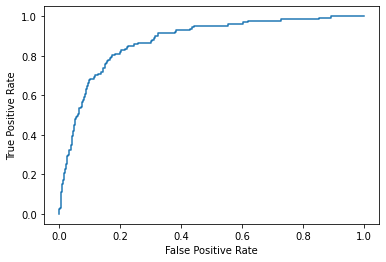

In [61]:
#define metrics source Datacamp
y_pred_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Respuestas

1. ¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?

Curva Roc y accuracy, nos dan los datos mas precisos para los usuarios objetivo y nos dan una probabilidaden caso de que queramos dar flexibilidad al modelo

2. Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?

Si, la precision es baja y el recall/ especificidad tambien.

3. ¿De qué otras formas podrías mejorar este modelo?

Pidiendo mas variables, revisando que variables causan mas ruido.